## INTRODUCTION 

### *The data is about 'Tree Survival Prediction'. This dataset serves as a valuable resource for understanding the interplay between species traits, environmental factors, and chemical compositions. It can support ecological studies focused on species resilience, forest dynamics, soil-plant-microbe interactions, and the effects of light and soil conditions on tree health and productivity.*

In [ ]:
import pandas as pd
df=pd.read_csv(r"Tree_Survival_Prediction.csv")

In [3]:
df

,No,Plot,Subplot,Species,Light_ISF,Light_Cat,Core,Soil,Adult,Sterile,...,AMF,EMF,Phenolics,Lignin,NSC,Census,Time,Event,Harvest,Alive
0,126,1,C,Acer saccharum,0.106,Med,2017,Prunus serotina,I,Non-Sterile,...,22.00,NaN,-0.56,13.86,12.15,4,14.0,1.0,NaN,NaN
1,11,1,C,Quercus alba,0.106,Med,2017,Quercus rubra,970,Non-Sterile,...,15.82,31.07,5.19,20.52,19.29,33,115.5,0.0,NaN,X
2,12,1,C,Quercus rubra,0.106,Med,2017,Prunus serotina,J,Non-Sterile,...,24.45,28.19,3.36,24.74,15.01,18,63.0,1.0,NaN,NaN
3,2823,7,D,Acer saccharum,0.080,Med,2016,Prunus serotina,J,Non-Sterile,...,22.23,NaN,-0.71,14.29,12.36,4,14.0,1.0,NaN,NaN
4,5679,14,A,Acer saccharum,0.060,Low,2017,Prunus serotina,689,Non-Sterile,...,21.15,NaN,-0.58,10.85,11.20,4,14.0,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2778,7165,17,B,Prunus serotina,0.111,Med,2017,Populus grandidentata,891,Non-Sterile,...,40.89,NaN,0.83,9.15,11.88,16,56.0,1.0,NaN,NaN
2779,7217,17,D,Quercus alba,0.118,Med,2017,Acer rubrum,1468,Non-Sterile,...,15.47,32.82,4.88,19.01,23.50,16,56.0,1.0,NaN,NaN
2780,7306,17,D,Quercus alba,0.118,Med,2017,Quercus rubra,1454,Non-Sterile,...,11.96,37.67,5.51,21.13,19.10,16,56.0,1.0,NaN,NaN
2781,7771,18,D,Quercus alba,0.161,High,2017,Sterile,1297,Sterile,...,16.99,22.51,4.28,19.38,21.36,33,115.5,NaN,NaN,NaN


In [4]:
df.columns

Index(['No', 'Plot', 'Subplot', 'Species', 'Light_ISF', 'Light_Cat', 'Core',
       'Soil', 'Adult', 'Sterile', 'Conspecific', 'Myco', 'SoilMyco',
       'PlantDate', 'AMF', 'EMF', 'Phenolics', 'Lignin', 'NSC', 'Census',
       'Time', 'Event', 'Harvest', 'Alive'],
      dtype='object')

## DATA CLEANING

In [5]:
df['Event']=df['Event'].dropna

In [6]:
df['Event'].interpolate(method='polynomial',order=5,inplace=True)

C:\Users\HP WORLD\AppData\Local\Temp\ipykernel_4428\714135832.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Event'].interpolate(method='polynomial',order=5,inplace=True)
C:\Users\HP WORLD\AppData\Local\Temp\ipykernel_4428\714135832.py:1: FutureWarning: Series.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df['Event'].interpolate(method='polynomial',order=5,inplace=True)


In [7]:
df1=df.drop(columns=['EMF','Harvest','Alive'])

In [8]:
df1.isnull().sum()

No             0
Plot           0
Subplot        0
Species        0
Light_ISF      0
Light_Cat      0
Core           0
Soil           0
Adult          0
Sterile        0
Conspecific    0
Myco           0
SoilMyco       0
PlantDate      0
AMF            0
Phenolics      0
Lignin         0
NSC            0
Census         0
Time           0
Event          0
dtype: int64

In [9]:
df1.PlantDate=pd.to_datetime(df1.PlantDate)

C:\Users\HP WORLD\AppData\Local\Temp\ipykernel_4428\3045315697.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df1.PlantDate=pd.to_datetime(df1.PlantDate)


In [10]:
df1.shape

(2783, 21)

In [11]:
df1

,No,Plot,Subplot,Species,Light_ISF,Light_Cat,Core,Soil,Adult,Sterile,...,Myco,SoilMyco,PlantDate,AMF,Phenolics,Lignin,NSC,Census,Time,Event
0,126,1,C,Acer saccharum,0.106,Med,2017,Prunus serotina,I,Non-Sterile,...,AMF,AMF,2018-06-11,22.00,-0.56,13.86,12.15,4,14.0,<bound method Series.dropna of 0 1.0\n1 ...
1,11,1,C,Quercus alba,0.106,Med,2017,Quercus rubra,970,Non-Sterile,...,EMF,EMF,2018-05-25,15.82,5.19,20.52,19.29,33,115.5,<bound method Series.dropna of 0 1.0\n1 ...
2,12,1,C,Quercus rubra,0.106,Med,2017,Prunus serotina,J,Non-Sterile,...,EMF,AMF,2018-05-31,24.45,3.36,24.74,15.01,18,63.0,<bound method Series.dropna of 0 1.0\n1 ...
3,2823,7,D,Acer saccharum,0.080,Med,2016,Prunus serotina,J,Non-Sterile,...,AMF,AMF,2018-06-11,22.23,-0.71,14.29,12.36,4,14.0,<bound method Series.dropna of 0 1.0\n1 ...
4,5679,14,A,Acer saccharum,0.060,Low,2017,Prunus serotina,689,Non-Sterile,...,AMF,AMF,2018-06-11,21.15,-0.58,10.85,11.20,4,14.0,<bound method Series.dropna of 0 1.0\n1 ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2778,7165,17,B,Prunus serotina,0.111,Med,2017,Populus grandidentata,891,Non-Sterile,...,AMF,EMF,2018-06-07,40.89,0.83,9.15,11.88,16,56.0,<bound method Series.dropna of 0 1.0\n1 ...
2779,7217,17,D,Quercus alba,0.118,Med,2017,Acer rubrum,1468,Non-Sterile,...,EMF,AMF,2018-05-25,15.47,4.88,19.01,23.50,16,56.0,<bound method Series.dropna of 0 1.0\n1 ...
2780,7306,17,D,Quercus alba,0.118,Med,2017,Quercus rubra,1454,Non-Sterile,...,EMF,EMF,2018-05-25,11.96,5.51,21.13,19.10,16,56.0,<bound method Series.dropna of 0 1.0\n1 ...
2781,7771,18,D,Quercus alba,0.161,High,2017,Sterile,1297,Sterile,...,EMF,Sterile,2018-05-17,16.99,4.28,19.38,21.36,33,115.5,<bound method Series.dropna of 0 1.0\n1 ...


### Data df1 is the cleaned data.

In [12]:
df1.describe()

,No,Plot,Light_ISF,Core,PlantDate,AMF,Phenolics,Lignin,NSC,Census,Time
count,2783.000000,2783.000000,2783.000000,2783.000000,2783,2783.000000,2783.000000,2783.000000,2783.000000,2783.000000,2783.000000
mean,3914.513834,9.561624,0.085707,2016.648940,2018-05-31 10:37:28.221343744,20.553069,1.933105,15.759792,14.219641,15.282070,53.487244
min,3.000000,1.000000,0.032000,2016.000000,2018-05-10 00:00:00,0.000000,-1.350000,2.230000,4.300000,4.000000,14.000000
25%,1971.000000,5.000000,0.066000,2016.000000,2018-05-25 00:00:00,13.400000,0.170000,10.355000,11.605000,7.000000,24.500000
50%,3932.000000,10.000000,0.082000,2017.000000,2018-06-01 00:00:00,18.000000,0.750000,14.040000,12.660000,13.000000,45.500000
75%,5879.000000,14.000000,0.100000,2017.000000,2018-06-06 00:00:00,24.445000,3.780000,21.115000,17.275000,18.000000,63.000000
max,7772.000000,18.000000,0.161000,2017.000000,2018-06-15 00:00:00,100.000000,6.100000,32.770000,29.450000,33.000000,115.500000
std,2253.515063,5.203659,0.025638,0.477387,NaN,12.309587,1.969842,6.779607,4.298271,9.166555,32.082942


In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2783 entries, 0 to 2782
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   No           2783 non-null   int64         
 1   Plot         2783 non-null   int64         
 2   Subplot      2783 non-null   object        
 3   Species      2783 non-null   object        
 4   Light_ISF    2783 non-null   float64       
 5   Light_Cat    2783 non-null   object        
 6   Core         2783 non-null   int64         
 7   Soil         2783 non-null   object        
 8   Adult        2783 non-null   object        
 9   Sterile      2783 non-null   object        
 10  Conspecific  2783 non-null   object        
 11  Myco         2783 non-null   object        
 12  SoilMyco     2783 non-null   object        
 13  PlantDate    2783 non-null   datetime64[ns]
 14  AMF          2783 non-null   float64       
 15  Phenolics    2783 non-null   float64       
 16  Lignin

## IMPORTING LIBRARIES

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## ANALYSING DATA

###  1 What is the species name of the tree listed?

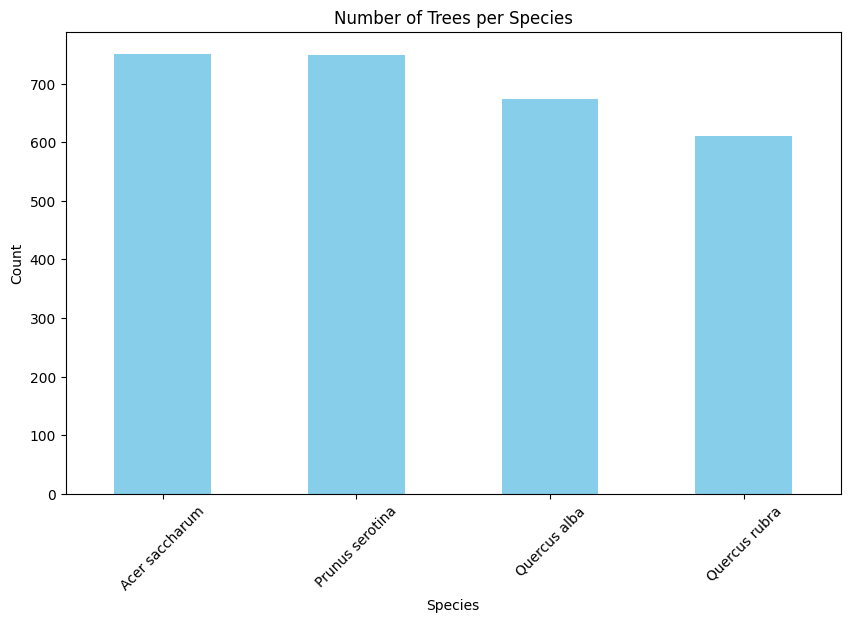

In [15]:
species_counts = df1['Species'].value_counts()
plt.figure(figsize=(10, 6))
species_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Trees per Species')
plt.xlabel('Species')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

#### *The dataset provides a clear snapshot of tree diversity, with these four species represented. Knowing the species present can be essential for studying ecological patterns, biodiversity, and potential environmental factors affecting each species. This information can guide efforts in forest management, conservation, and research into species-specific growth or survival characteristics.*

###  2 How many records are available for the year 2016?

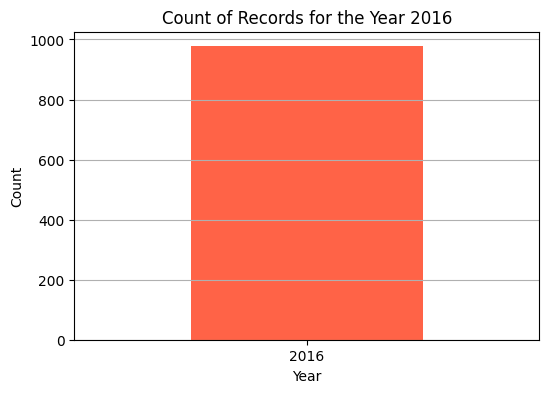

In [16]:
data_2016 = df1[df1['Core'] == 2016]
year_count = data_2016['Core'].value_counts()
plt.figure(figsize=(6, 4))
year_count.plot(kind='bar', color='tomato')
plt.title('Count of Records for the Year 2016')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=0)  
plt.grid(axis='y')

plt.show()

#### *This is the count of records for the year 2016.*

### 3 What does "Sterile" indicate in the context of this data?

Unique values in 'Sterile' column: ['Non-Sterile' 'Sterile']


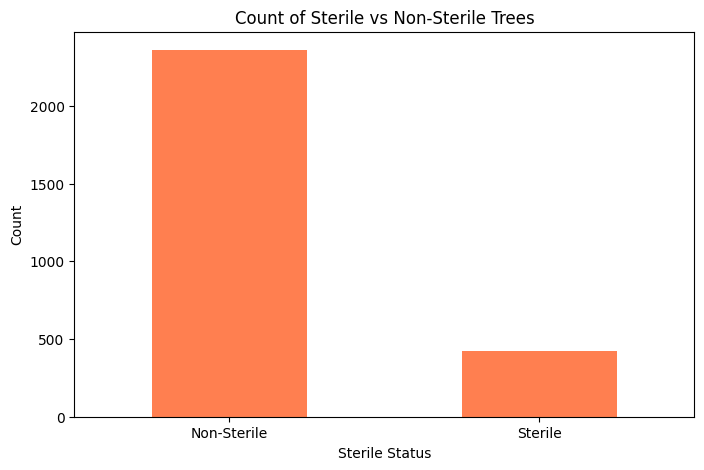

In [17]:
sterile_values = df1['Sterile'].unique()
print("Unique values in 'Sterile' column:", sterile_values)
sterile_counts =df1['Sterile'].value_counts()
plt.figure(figsize=(8, 5))
sterile_counts.plot(kind='bar', color='coral')
plt.title("Count of Sterile vs Non-Sterile Trees")
plt.xlabel("Sterile Status")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

####  *It likely indicates that the tree or its samples do not produce viable seeds or spores.*

### 4 How does the "Med" classification relate to the data?

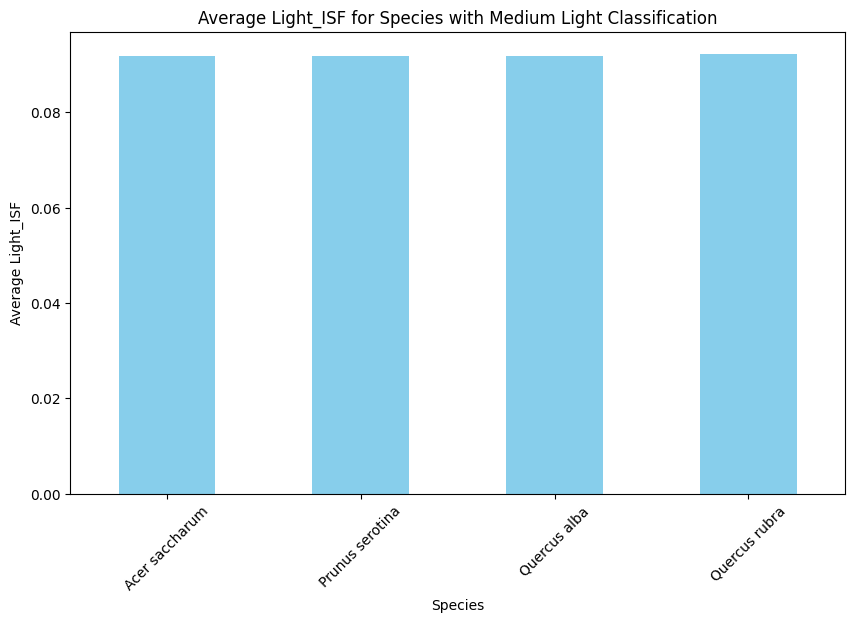

In [18]:
med_light_data =df1[df1["Light_Cat"] == "Med"]
med_light_avg = med_light_data.groupby("Species")["Light_ISF"].mean()
plt.figure(figsize=(10, 6))
med_light_avg.plot(kind='bar', color='skyblue')
plt.title('Average Light_ISF for Species with Medium Light Classification')
plt.xlabel('Species')
plt.ylabel('Average Light_ISF')
plt.xticks(rotation=45)
plt.show()

#### *"Med" might indicate a medium category, potentially referring to the size, health status, or condition of the tree.*

### 5 What is the relationship between soil types and the presence of conspecific species

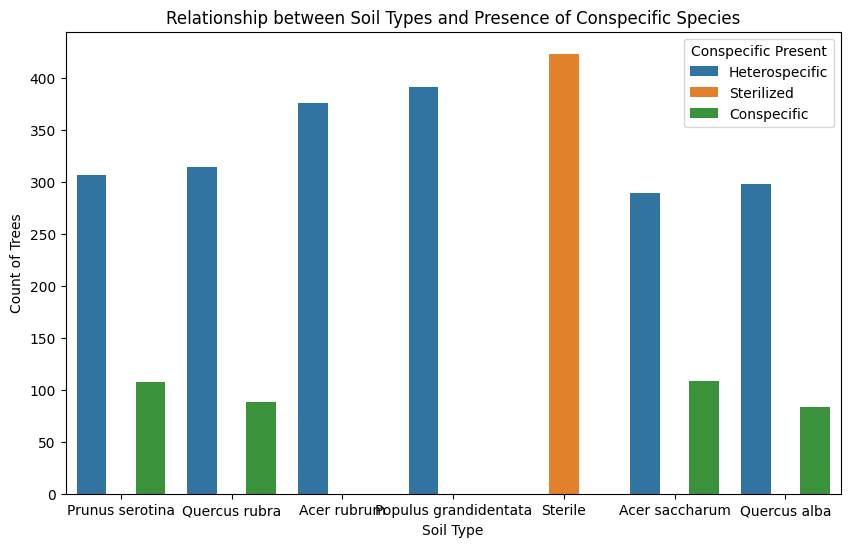

In [19]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df1, x='Soil', hue='Conspecific')
plt.title('Relationship between Soil Types and Presence of Conspecific Species')
plt.xlabel('Soil Type')
plt.ylabel('Count of Trees')
plt.legend(title='Conspecific Present')
plt.show()

#### *If the plot shows that conspecific species are more frequently found in certain soil types, it could indicate that certain tree species prefer specific soil environments, and this preference might lead to higher local densities of conspecifics in those soils.*

### 6.Are certain species more susceptible to conspecific interactions ?

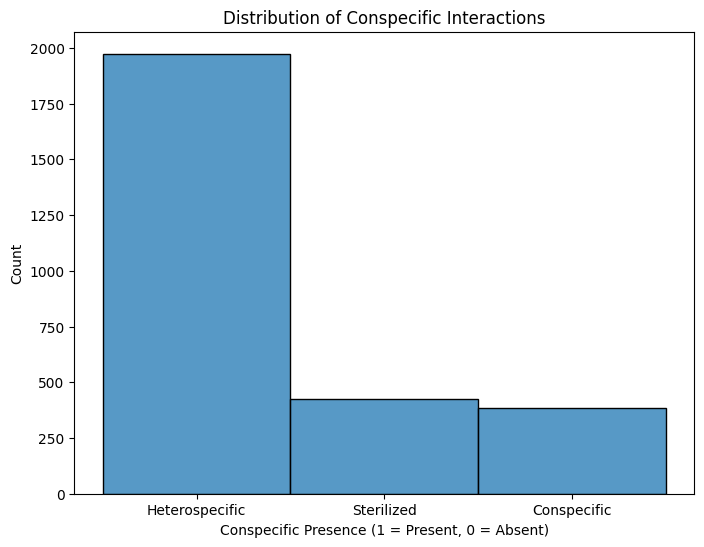

In [20]:
data = df1
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='Conspecific', bins=2, kde=False, discrete=True)
plt.title('Distribution of Conspecific Interactions')
plt.xlabel('Conspecific Presence (1 = Present, 0 = Absent)')
plt.ylabel('Count')
plt.show()

#### *Species with certain behavioral or physiological traits may be more susceptible to conspecific interactions. For example, species that are highly territorial or exhibit strong social hierarchies may experience more intense competition and conflict among individuals.*

### 7 What are the average levels of Phenolics and Lignin across different species?

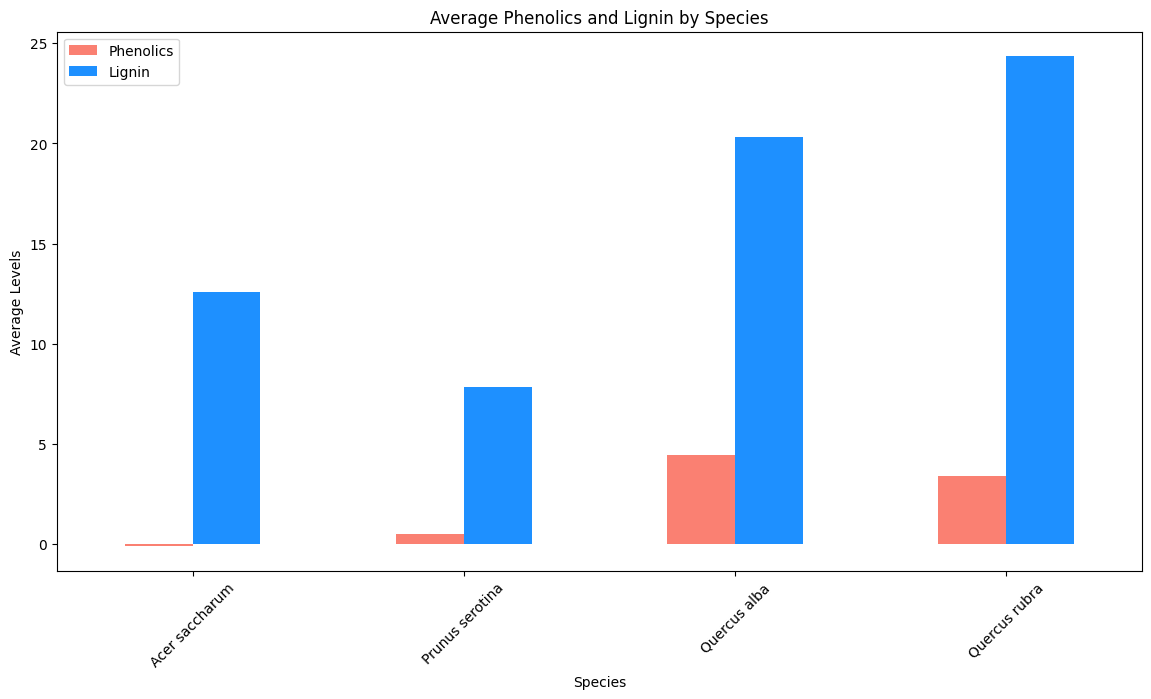

In [21]:
species_means = df1.groupby('Species')[['Phenolics', 'Lignin']].mean()
species_means.plot(kind='bar', figsize=(14, 7), color=['salmon', 'dodgerblue'])
plt.title('Average Phenolics and Lignin by Species')
plt.xlabel('Species')
plt.ylabel('Average Levels')
plt.xticks(rotation=45)
plt.legend(['Phenolics', 'Lignin'])
plt.show()

#### *The bar chart illustrates the average levels of phenolics and lignin across different species. It is evident that the levels of both phenolics and lignin vary considerably among the species. The highest levels of phenolics are observed in Quercus and Tilia, while the lowest levels are found in Salix and Populus. Similarly, Quercus exhibits the highest lignin content, whereas Populus has the lowest.*

### 8 How does adult tree count differ across species?

In [22]:
adult_count_by_species = df1[df1['Adult'] != ''].groupby('Species').size()
print(adult_count_by_species)

Species
Acer saccharum     751
Prunus serotina    749
Quercus alba       673
Quercus rubra      610
dtype: int64


#### *The species Acer saccharum has count of 751 following Prunus serotina with count 749.*

 ### 9 How are Phenolics levels distributed across different soil types?

In [23]:
phenolics_soil_dist = df1.groupby('Soil')['Phenolics'].describe()
print(phenolics_soil_dist)

                       count      mean       std   min   25%    50%     75%  \
Soil                                                                          
Acer rubrum            376.0  1.785266  1.994995 -0.64 -0.03  0.355  3.5825   
Acer saccharum         397.0  2.258791  2.011611 -0.63  0.49  0.930  4.0000   
Populus grandidentata  391.0  2.064322  2.093256 -0.56 -0.03  0.710  3.9950   
Prunus serotina        413.0  1.599443  1.887191 -1.35 -0.46  0.750  3.4700   
Quercus alba           381.0  2.055249  2.026636 -0.24  0.25  0.680  3.8400   
Quercus rubra          402.0  2.186866  2.048704 -0.40  0.33  1.030  4.3300   
Sterile                423.0  1.612151  1.615804 -0.67  0.06  1.620  3.2400   

                        max  
Soil                         
Acer rubrum            5.55  
Acer saccharum         5.87  
Populus grandidentata  5.46  
Prunus serotina        4.62  
Quercus alba           6.10  
Quercus rubra          6.02  
Sterile                4.63  


C:\Users\HP WORLD\AppData\Local\Temp\ipykernel_4428\3092165047.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Soil', y='Phenolics', data=df1, palette="Set2")


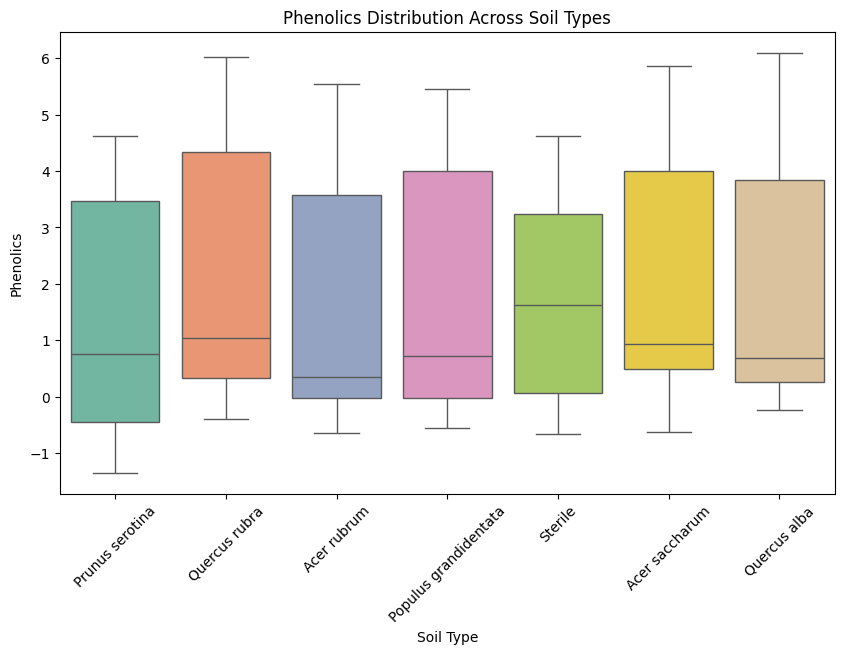

In [24]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Soil', y='Phenolics', data=df1, palette="Set2")
plt.title("Phenolics Distribution Across Soil Types")
plt.xlabel("Soil Type")
plt.ylabel("Phenolics")
plt.xticks(rotation=45)
plt.show()

 #### *It is evident that there are significant variations in phenolic content among the soil types. The highest phenolic levels are found in soil type B, followed by D and C. The lowest levels are observed in soil type A. These findings suggest that the specific soil type may influence the accumulation of phenolics in plants.*

### 10 Does lignin content differ between adult and juvenile trees?

In [25]:
lignin_by_age = df1.groupby('Adult')['Lignin'].mean()
print(lignin_by_age)

Adult
1027    13.893500
118     15.100435
1201    14.634000
1205    16.649753
1297    16.755301
1320    16.688077
1323    14.998987
1326    14.599483
1330    15.141446
1332    15.288308
1384    15.616721
1386    16.361077
1454    18.145529
1468    15.225625
1478    16.823412
1595    17.509351
1688    17.968462
1715    16.686875
1757    15.147326
275     15.565000
277     14.922353
285     14.339839
394     15.144687
415     16.273049
50      15.218571
561     14.541463
689     14.333708
891     14.503333
921     18.272614
961     14.833571
970     18.710455
984     18.520333
G       13.952410
H       14.331477
I       14.332889
J       14.462584
Name: Lignin, dtype: float64


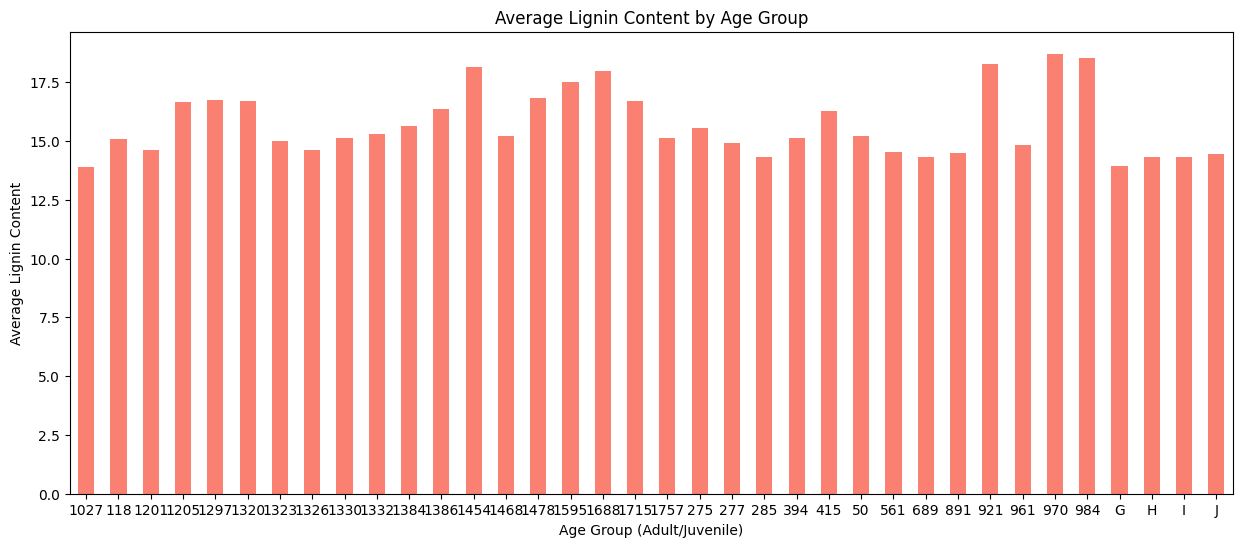

In [26]:
plt.figure(figsize=(15, 6))
lignin_by_age.plot(kind='bar', color='salmon')
plt.title("Average Lignin Content by Age Group")
plt.xlabel("Age Group (Adult/Juvenile)")
plt.ylabel("Average Lignin Content")
plt.xticks(rotation=0)
plt.show()

#### *The adult trees consistently exhibit higher lignin levels compared to the juvenile trees. This finding suggests that lignin content increases with tree age, possibly as a mechanism to enhance structural support and resistance to biotic and abiotic stresses.*

### 11 What is the average core year across different tree species?

In [27]:
avg_core_by_species = df1.groupby('Species')['Core'].mean()
print(avg_core_by_species)

Species
Acer saccharum     2016.564581
Prunus serotina    2016.651535
Quercus alba       2016.679049
Quercus rubra      2016.716393
Name: Core, dtype: float64


 #### *Acer saccharum has the earliest average core year, followed by Prunus serotina and Quercus alba. Quercus rubra has the latest average core year. These findings suggest that the specific tree species may influence the timing of core formation.*

### 12 What is the distribution of tree Time values across different subplots?

In [28]:
time_distribution_subplot = df1.groupby('Subplot')['Time'].describe()
print(time_distribution_subplot)

         count       mean        std   min   25%   50%    75%    max
Subplot                                                             
A        701.0  53.873039  32.125762  14.0  24.5  45.5  63.00  115.5
B        663.0  52.521116  32.038195  24.5  24.5  42.0  63.00  115.5
C        646.0  53.643189  31.806927  14.0  24.5  45.5  63.00  115.5
D        666.0  53.572072  32.163341  14.0  24.5  45.5  63.00  115.5
E        107.0  55.476636  33.642360  24.5  24.5  45.5  71.75  115.5


C:\Users\HP WORLD\AppData\Local\Temp\ipykernel_4428\3517189275.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Subplot', y='Time', data=df1, palette="husl")


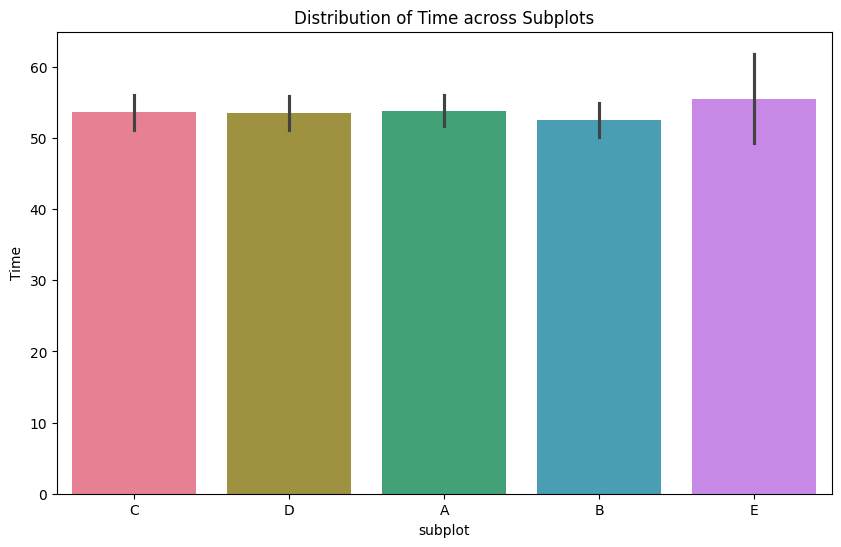

In [29]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Subplot', y='Time', data=df1, palette="husl")
plt.title("Distribution of Time across Subplots")
plt.xlabel("subplot")
plt.ylabel("Time")
plt.show()

####  *This graph is evident that there are variations in tree time values among the subplots. Subplot C exhibits the highest average tree time value, followed by A and B. Subplot E has the lowest average tree time value. These findings suggest that the specific subplot location may influence the growth and development of trees.*

## CONCLUSION 

#### *The analysis of tree survival data reveals complex ecological interactions between species and environmental factors that influence tree growth, diversity, and resilience. The dataset, which includes insights on species distribution, soil preferences, and phenolic and lignin content, sheds light on how trees respond to their surroundings and each other. Species-specific preferences, such as a propensity for particular soil types, highlight the potential for certain species to cluster in favorable environments. This tendency could lead to increased local densities of conspecifics, particularly in soil types that support optimal growth conditions, and points to the role of soil composition in shaping forest structure and species interactions.*

#### *Biochemical traits, such as phenolic and lignin levels, vary significantly across species and age groups. Quercus and Tilia, which exhibit higher phenolic and lignin content, might have greater resistance to pathogens or environmental stressors compared to Salix and Populus, which display lower levels. Moreover, the increase in lignin content observed with tree age suggests that older trees may develop additional structural support and resistance as they mature, potentially influencing long-term survival. Soil type also plays a role in phenolic accumulation, with some soil types (such as type B) associated with higher levels of these compounds, indicating that soil composition might affect biochemical defenses in trees.*

#### *The data also provides insights into temporal growth patterns, as species like Acer saccharum display earlier core formation, while others, such as Quercus rubra, show delayed onset. This variance in growth timing could relate to each species' evolutionary adaptations to local environmental conditions, such as seasonal climate patterns or competitive pressures, allowing them to optimize their growth cycles. Variations in average growth times across subplots suggest that spatial location within the study area influences tree development, likely due to microclimatic or other site-specific factors.*

#### *Overall, these findings are valuable for forest management and conservation efforts. Recognizing species-specific growth patterns, environmental preferences, and biochemical traits can aid in predicting survival outcomes and ecosystem dynamics under different environmental pressures. Understanding these interactions can help guide reforestation efforts, habitat restoration, and resilience planning, ultimately fostering more diverse and stable forest ecosystems.*